<a href="https://colab.research.google.com/github/WenchaoHanSRI/U_net/blob/main/Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb
from PIL import Image
from matplotlib import pyplot as plt
import os

# Get the github repository files

In [2]:
!git clone https://github.com/WenchaoHanSRI/U_net

Cloning into 'U_net'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 83 (delta 2), reused 1 (delta 1), pack-reused 75
Unpacking objects: 100% (83/83), done.


# Switch the running file directory

In [3]:
%cd /content/U_net/U_net_WH/

/content/U_net/U_net_WH


# Get the pre-trained model

In [26]:
!wget 'https://drive.google.com/file/d/18jRivGhFium-URAhMMHTV-js-MsBUMzR/view?usp=sharing'

--2022-10-05 02:10:10--  https://drive.google.com/file/d/18jRivGhFium-URAhMMHTV-js-MsBUMzR/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.250.141.139, 142.250.141.138, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  66.05K  --.-KB/s    in 0.04s   

2022-10-05 02:10:10 (1.58 MB/s) - ‘view?usp=sharing’ saved [67636]



# Run the script for validation
In this example case, validation only applied to the two sample images saved in 'data/testimgsall' directory. The predicted mask is validated against the groundtruth mask in 'data/testmasksall' directory.

**User can review the results in the provided links after running the script below:**

In [9]:
!python3 validate.py

INFO: Using device cpu
INFO: Network:
	3 input channels
	2 output channels (classes)
	Transposed conv upscaling
INFO: Creating dataset with 2 examples
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.13.3
wandb: Run data is saved locally in /content/U_net/U_net_WH/wandb/run-20221005_005516-3ek75sou
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run usual-serenity-1
wandb: ⭐️ View project at https://wandb.ai/anony-moose-412537/U-Net?apiKey=320f9414bb38fe349b8bba


Alternatively, user can run the code below, without using Weights & Biases. The averaged error metrics are printed out and the predicted masks can be find in the /prediction/ folder, which is automatically created.






In [10]:
!python3 validate_folder.py

INFO: Using device cpu
INFO: Network:
	3 input channels
	2 output channels (classes)
	Transposed conv upscaling
INFO: Creating dataset with 2 examples
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
INFO: Settings:
        Batch size:      1
        Validation size: 2
        Checkpoints:     True
        Device:          cpu
        Images scaling:  1
        Mixed Precision: False
    
### successfully load the pretrained model ###
Validation round:   0% 0/2 [00:00<?, ?batch/s]/content/U_net/U_net_WH/evaluate_folder.py:23: UserWarning: __floordiv__ is deprecated, and its behavior wil

# Visualize the prediction results

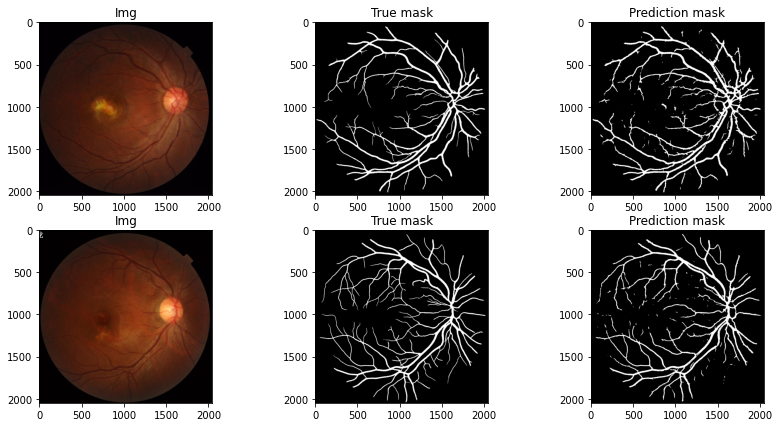

In [25]:
## get the image directories
path_cwd = os.getcwd()
path_img = os.path.join(path_cwd, 'data/testimgsall')
path_true_mask = os.path.join(path_cwd, 'data/testmasksall')
path_pred_mask = os.path.join(path_cwd, 'prediction/')

## plot the figures for visualization
fig = plt.figure(figsize=(14, 7))
i = 1
for (f_im, f_tm, f_pm) in zip (os.listdir(path_img), 
                      os.listdir(path_true_mask), 
                      os.listdir(path_pred_mask)):
  ax = fig.add_subplot(2, 3, i)
  img = Image.open(os.path.join
                   (path_img, f_im)
                   )
  ax.imshow(img)
  ax.set_title('Img')
  i += 1
  ax = fig.add_subplot(2, 3, i)
  true_mask = Image.open(os.path.join
                         (path_true_mask, f_tm)
                         )
  ax.imshow(true_mask)
  ax.set_title('True mask')
  i += 1
  ax = fig.add_subplot(2, 3, i)
  pred_mask = Image.open(os.path.join
                         (path_pred_mask, f_pm)
                         )
  ax.imshow(pred_mask)
  ax.set_title('Prediction mask')
  i += 1
plt.show()